# Inverse problem for the diffusion-reaction system

## The problem we are solving

We will solve an inverse problem for diffusion-reaction systems for unknowns $D$ and $k_f$:

$$\frac{\partial C_A}{\partial t}=D\frac{\partial^2C_A}{\partial x^2}-k_fC_AC_B^2,$$
$$\frac{\partial C_B}{\partial t}=D\frac{\partial^2C_B}{\partial x^2}-2k_fC_AC_B^2$$

for $x\in[0,1]$ and $t\in[0,10]$ initial conditions

$$C_A(x,0)=C_B(x,0)=e^{-20x}$$

and boundary conditions

$$C_A(0,t)=C_B(0,t)=1\\C_A(1,t)=C_B(1,t)=0.$$

The expected values of $D$ and $k_f$ are $2\cdot10^{-3}$ and 0.1, respectively.



Below is the dimensional analysis for the given **diffusion-reaction system** with unknowns $ D $ and $ k_f $:

The equations are:  
$$
\frac{\partial C_A}{\partial t} = D \frac{\partial^2 C_A}{\partial x^2} - k_f C_A C_B^2, \quad \frac{\partial C_B}{\partial t} = D \frac{\partial^2 C_B}{\partial x^2} - 2k_f C_A C_B^2.
$$



## Dimensional Analysis


---

### Step 1: Assign Dimensions to Variables

1. **Spatial Coordinate $x$:**  
   - The dimension of $x$ is length:  

     $$
     [x] = L.
     $$

2. **Time $t$:**  
   - The dimension of time is:  

     $$
     [t] = T.
     $$

3. **Concentrations $C_A$ and $C_B$:**  
   - Concentrations typically have dimensions of **moles per unit volume**:  

     $$
     [C_A] = [C_B] = N / L^3,
     $$
     where $N$ represents the amount of substance (moles).

4. **Diffusion Coefficient $D$:**  
   - The diffusion term involves $\partial^2 C_A / \partial x^2$, which has dimensions: 

     $$
     \left[\frac{\partial^2 C_A}{\partial x^2}\right] = \frac{[C_A]}{[x]^2} = \frac{N}{L^5}.
     $$
   - The time derivative $\partial C_A / \partial t$ has dimensions:  

     $$
     \left[\frac{\partial C_A}{\partial t}\right] = \frac{[C_A]}{[t]} = \frac{N}{L^3 T}.
     $$
   - For dimensional consistency in the diffusion term $D \frac{\partial^2 C_A}{\partial x^2}$, $D$ must have dimensions: 

     $$
     [D] \cdot \frac{N}{L^5} = \frac{N}{L^3 T} \implies [D] = \frac{L^2}{T}.
     $$

5. **Reaction Rate Constant $k_f$:**  
   - The reaction term $k_f C_A C_B^2$ must have the same dimensions as $\partial C_A / \partial t$, which is $N / (L^3 T)$.  
   - The product $C_A C_B^2$ has dimensions:  

     $$
     [C_A C_B^2] = \left(\frac{N}{L^3}\right)\left(\frac{N}{L^3}\right)^2 = \frac{N^3}{L^9}.
     $$
   - To balance dimensions, $k_f$ must satisfy:  
   
     $$
     [k_f] \cdot \frac{N^3}{L^9} = \frac{N}{L^3 T} \implies [k_f] = \frac{L^6}{N^2 T}.
     $$

---

### Step 2: Initial and Boundary Conditions

- **Initial Conditions:** $C_A(x,0) = C_B(x,0) = e^{-20x}$  
  - The exponential function is dimensionless, so the initial condition is consistent with $C_A$ and $C_B$ having dimensions $N / L^3$.

- **Boundary Conditions:** $C_A(0,t) = C_B(0,t) = 1$ and $C_A(1,t) = C_B(1,t) = 0$  
  - These conditions specify dimensionless values for $C_A$ and $C_B$ scaled appropriately.

---

### Step 3: Summary of Dimensions

| Variable/Parameter     | Physical Meaning                   | Dimensions            |
|------------------------|-----------------------------------|-----------------------|
| $x$                  | Spatial coordinate                | $L$                 |
| $t$                  | Time                              | $T$                 |
| $C_A, C_B$           | Concentrations (solute)           | $N / L^3$           |
| $D$                  | Diffusion coefficient             | $L^2 / T$           |
| $k_f$                | Reaction rate constant            | $L^6 / (N^2 T)$     |

---

### Step 4: Given Values

- $D = 2 \cdot 10^{-3}$: The value is consistent with $[D] = L^2 / T$.  
- $k_f = 0.1$: The value is consistent with $[k_f] = L^6 / (N^2 T)$.  

These values and dimensions are appropriate for the given system.


## Implementation

Below is the implementation of the inverse problem for the diffusion-reaction system using PINNx.

We first load the dataset and define the PDE and neural network model. We then define the boundary and initial conditions, create the geometry, and set up the problem. Finally, we generate training data and solve the inverse problem to estimate the diffusion coefficient $D$ and reaction rate constant $k_f$.

In [1]:
import brainstate as bst
import brainunit as u
import numpy as np

import deepxde.experimental as deepxde


Define the physical units for the problem:

In [2]:
unit_of_x = u.meter
unit_of_t = u.second
unit_of_c = u.mole / u.meter ** 3


Define the parameters and the PDE:

In [3]:

kf = bst.ParamState(0.05 * u.meter ** 6 / u.mole ** 2 / u.second)
D = bst.ParamState(1.0 * u.meter ** 2 / u.second)


def pde(x, y):
    jacobian = net.jacobian(x, x='t')
    hessian = net.hessian(x)
    ca, cb = y['ca'], y['cb']
    dca_t = jacobian['ca']['t']
    dcb_t = jacobian['cb']['t']
    dca_xx = hessian['ca']['x']['x']
    dcb_xx = hessian['cb']['x']['x']
    eq_a = dca_t - 1e-3 * D.value * dca_xx + kf.value * ca * cb ** 2
    eq_b = dcb_t - 1e-3 * D.value * dcb_xx + 2 * kf.value * ca * cb ** 2
    return [eq_a, eq_b]


Define the neural network model:

In [4]:
net = deepxde.nn.Model(
    deepxde.nn.DictToArray(x=unit_of_x, t=unit_of_t),
    deepxde.nn.FNN([2] + [20] * 3 + [2], "tanh"),
    deepxde.nn.ArrayToDict(ca=unit_of_c, cb=unit_of_c),
)

Define the geometry:

In [5]:
geom = deepxde.geometry.Interval(0, 1)
timedomain = deepxde.geometry.TimeDomain(0, 10)
geomtime = deepxde.geometry.GeometryXTime(geom, timedomain)
geomtime = geomtime.to_dict_point(x=unit_of_x, t=unit_of_t)

Define the boundary condition function:

In [6]:
def fun_bc(x):
    c = (1 - x['x'] / unit_of_x) * unit_of_c
    return {'ca': c, 'cb': c}


bc = deepxde.icbc.DirichletBC(fun_bc)

Define the initial condition function:

In [7]:
def fun_init(x):
    return {
        'ca': u.math.exp(-20 * x['x'] / unit_of_x) * unit_of_c,
        'cb': u.math.exp(-20 * x['x'] / unit_of_x) * unit_of_c,
    }


ic = deepxde.icbc.IC(fun_init)

Define a function to generate training data:

In [8]:

def gen_traindata():
    data = np.load("../dataset/reaction.npz")
    t, x, ca, cb = data["t"], data["x"], data["Ca"], data["Cb"]
    X, T = np.meshgrid(x, t)
    x = {'x': X.flatten() * unit_of_x, 't': T.flatten() * unit_of_t}
    y = {'ca': ca.flatten() * unit_of_c, 'cb': cb.flatten() * unit_of_c}
    return x, y


observe_x, observe_y = gen_traindata()
observe_bc = deepxde.icbc.PointSetBC(observe_x, observe_y)

Define the problem and solve the inverse problem:

In [9]:
data = deepxde.problem.TimePDE(
    geomtime,
    pde,
    [bc, ic, observe_bc],
    net,
    num_domain=2000,
    num_boundary=100,
    num_initial=100,
    anchors=observe_x,
    num_test=50000,
)


Compiling trainer...
'compile' took 0.055027 s

Training trainer...

Step      Train loss                                              Test loss                                               Test metric 
0         [0.09352963 * 10.0^0 * (mmolar / second) ** 2,          [0.08070567 * 10.0^0 * (mmolar / second) ** 2,          []          
           0.30233935 * 10.0^0 * (mmolar / second) ** 2,           0.28232208 * 10.0^0 * (mmolar / second) ** 2,                      
           {'ibc0': {'ca': 2.5078168 * mmolar,                     {'ibc0': {'ca': 2.5078168 * mmolar,                                
                     'cb': 2.447632 * mmolar}},                              'cb': 2.447632 * mmolar}},                               
           {'ibc1': {'ca': 1.8000234 * mmolar,                     {'ibc1': {'ca': 1.8000234 * mmolar,                                
                     'cb': 0.0453864 * mmolar}},                             'cb': 0.0453864 * mmolar}},                 

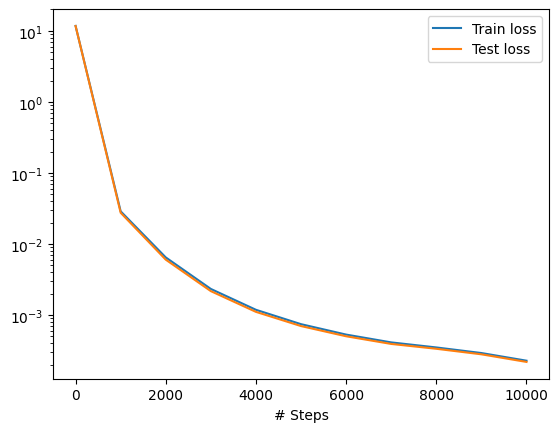

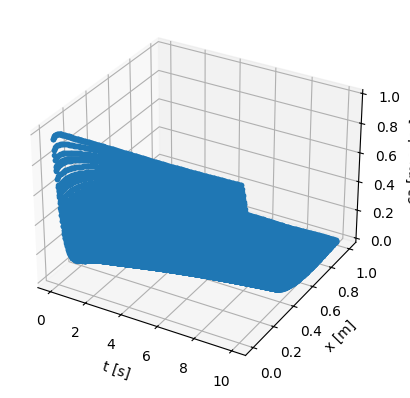

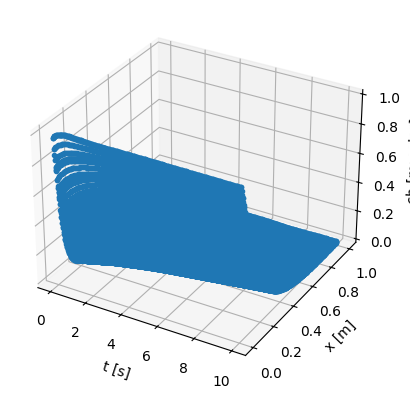

In [10]:
variable = deepxde.callbacks.VariableValue([kf, D], period=1000, filename="./variables.dat")
model = deepxde.Trainer(data, external_trainable_variables=[kf, D])
model.compile(bst.optim.Adam(0.001)).train(iterations=80000, callbacks=[variable])
model.saveplot(issave=True, isplot=True)

The inverse problem is solved, and the estimated values of $D$ and $k_f$ are obtained. The results are as follows:

In [11]:
kf

ParamState(
  value=0.01828403 * 10.0^0 * metre ** 6 * second ** -1 * mole ** -2
)

In [12]:
D

ParamState(
  value=1.4558828 * meter2 / second
)